In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


import statsmodels.api as sm

from IPython.display import display
import pickle

In [2]:
df = pd.read_csv("../data/kappa_distance_2021.csv")
df = df.drop(['Unnamed: 0'], axis=1)

df = df.dropna()

df.head()

,timestamp,kappa,distance
0,2021-01-01 00:02:24,4.747468,1.772268
1,2021-01-02 00:02:24,10.500496,1.998574
2,2021-01-03 00:02:24,11.024607,1.892996
3,2021-01-04 00:02:24,14.888399,1.946318
4,2021-01-05 00:02:24,17.697876,1.977037


In [8]:
# timestampを変換する
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [10]:
print(type(df["timestamp"]))

<class 'pandas.core.series.Series'>


<Axes: >

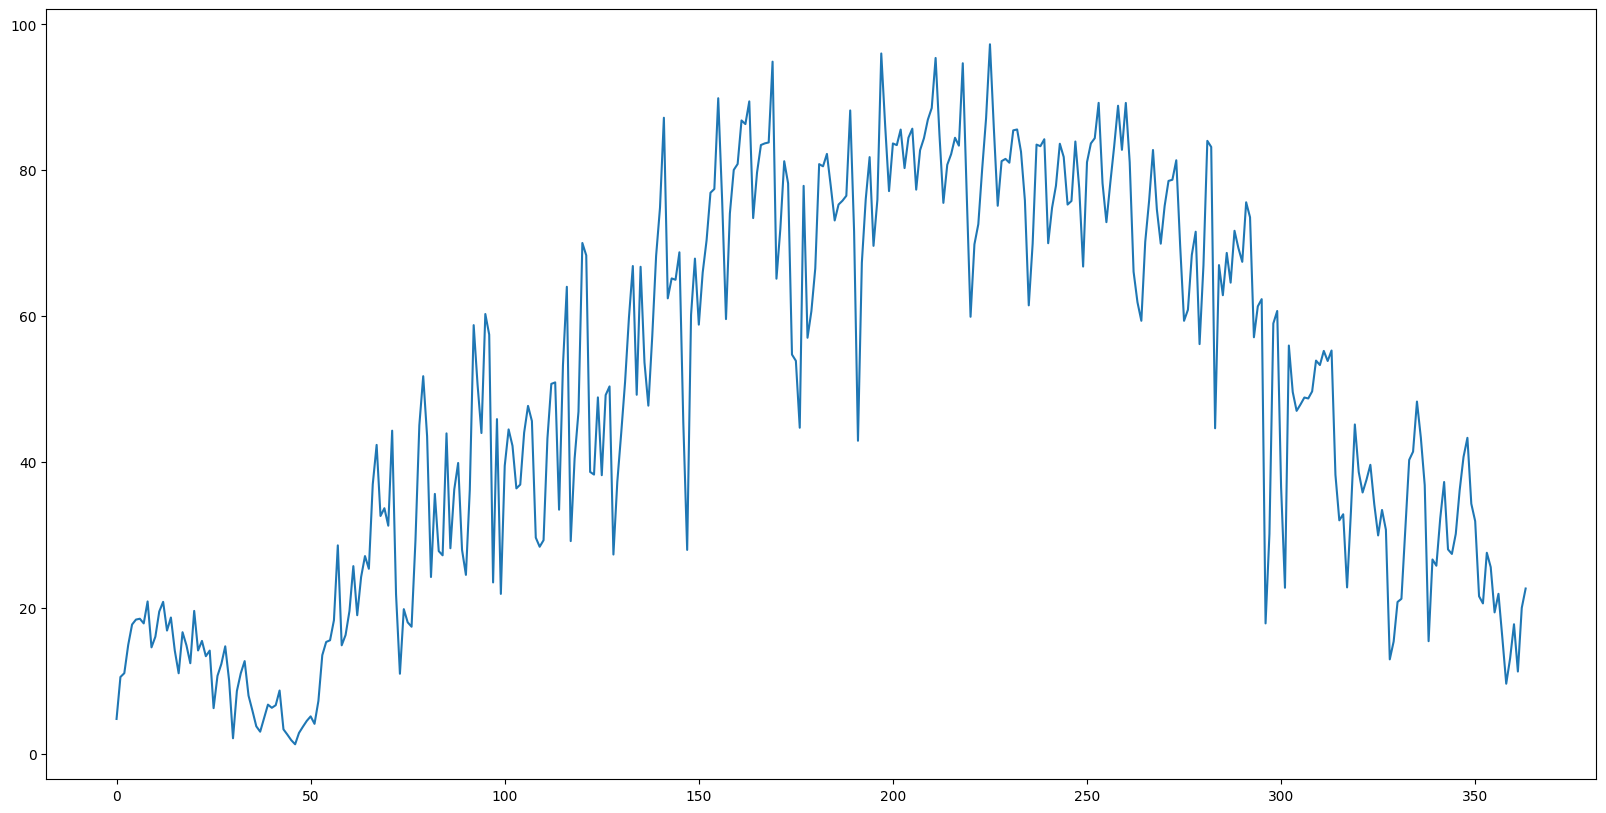

In [3]:
plt.figure(figsize=(20, 10))
plt.rcParams['figure.figsize'] = [20, 10]
y = df['kappa']
y.plot()

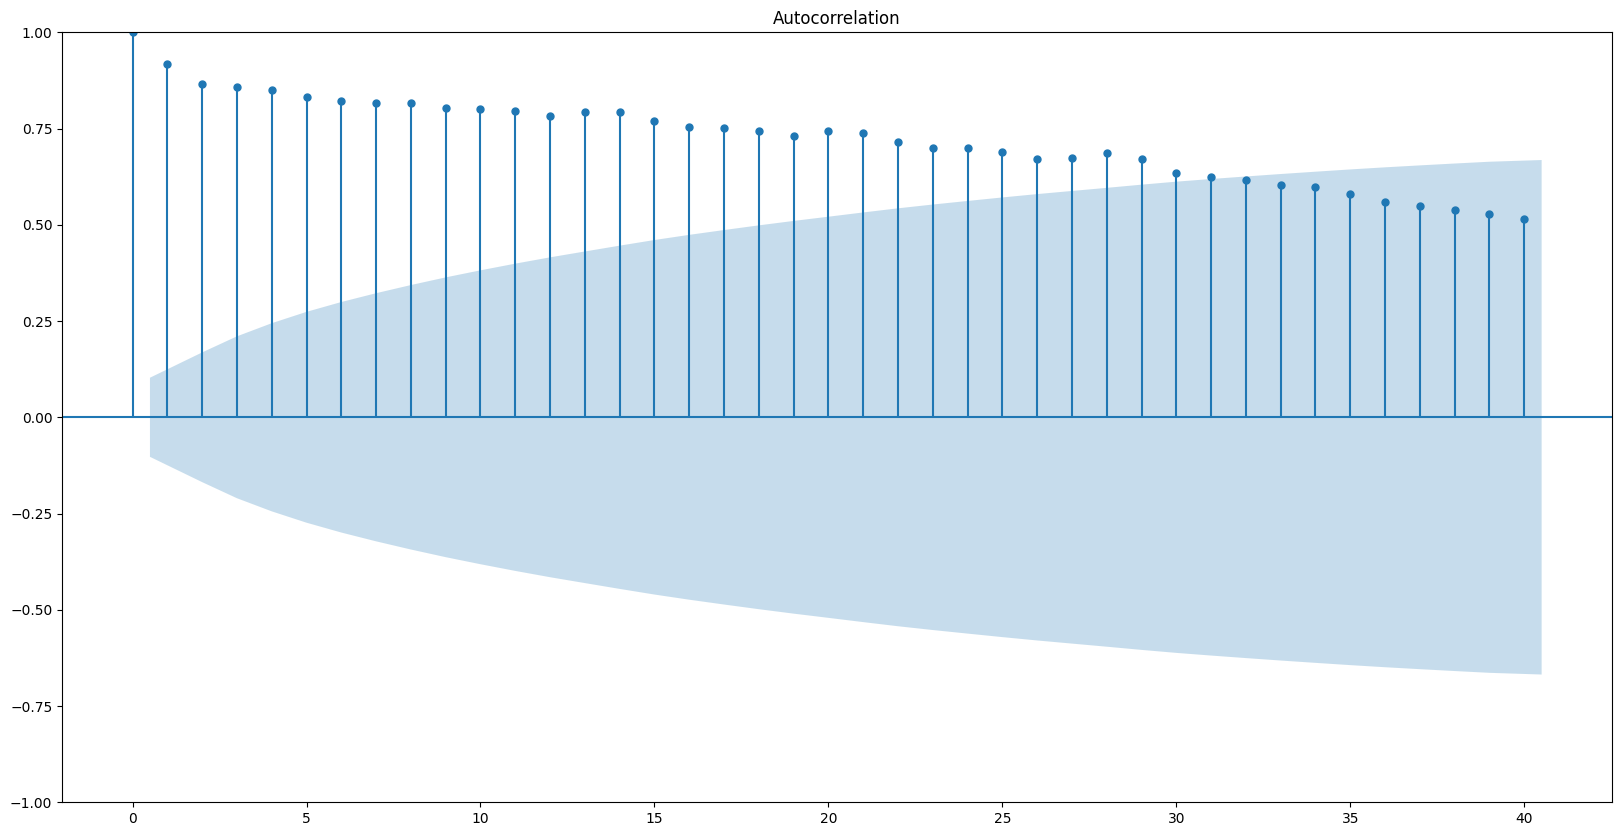

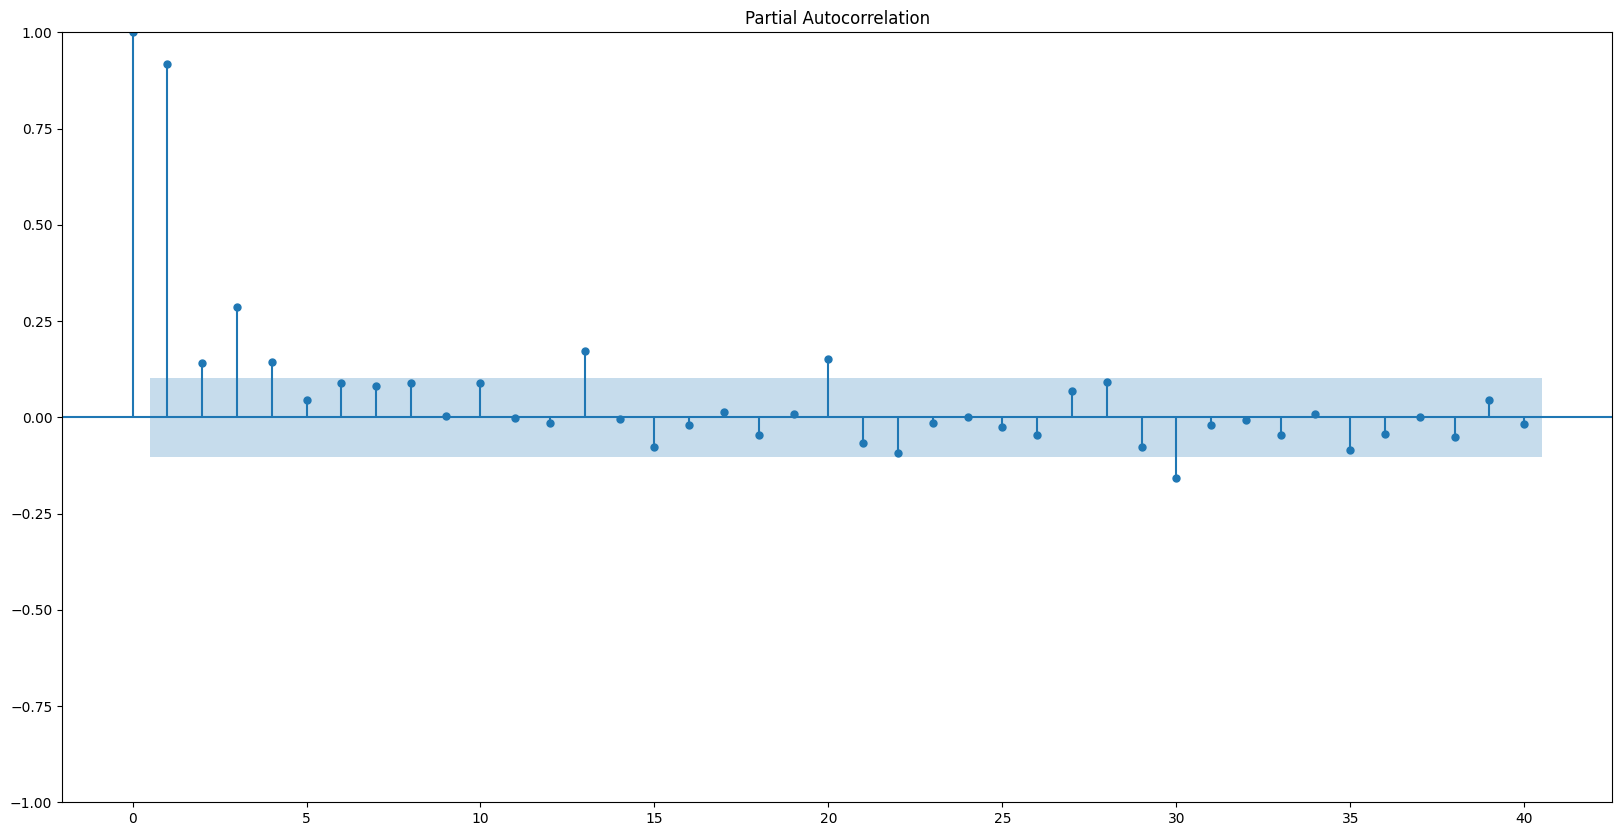

In [4]:
fig_1 = sm.graphics.tsa.plot_acf(y, lags=40)
fig_2 = sm.graphics.tsa.plot_pacf(y, lags=40)

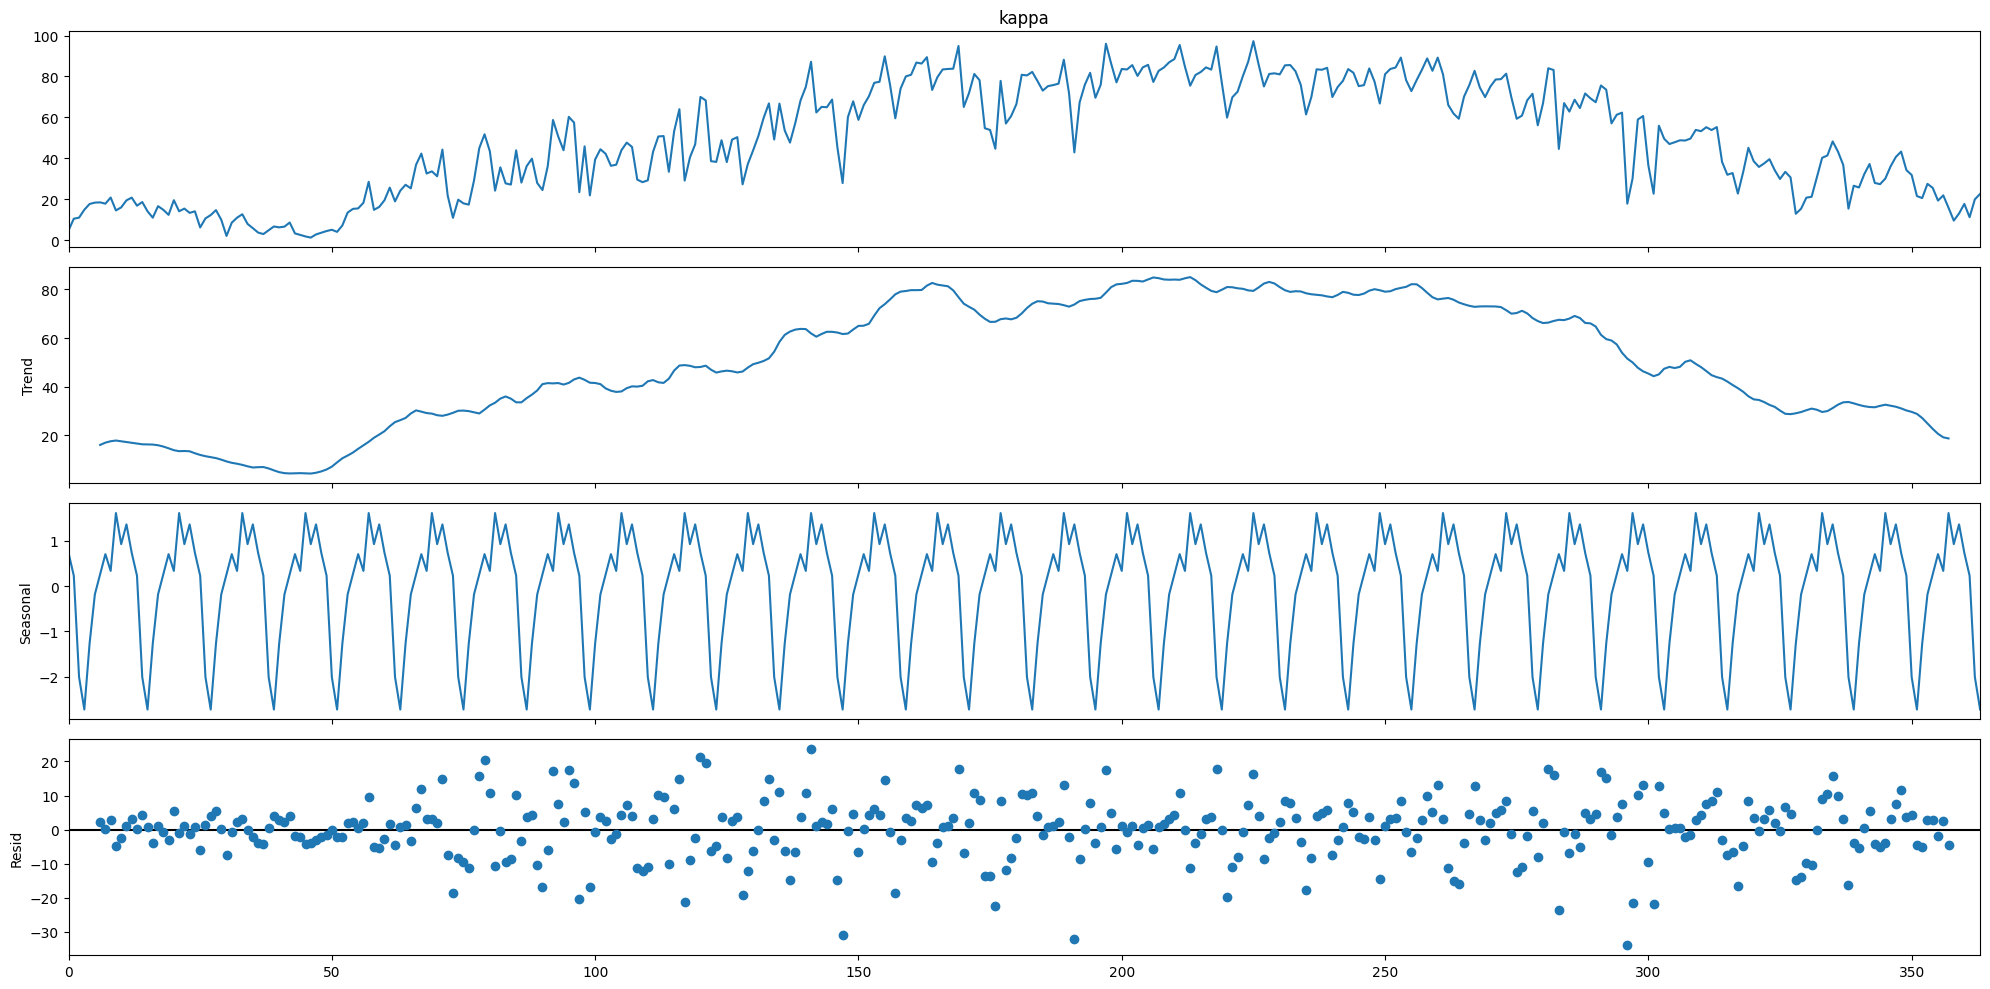

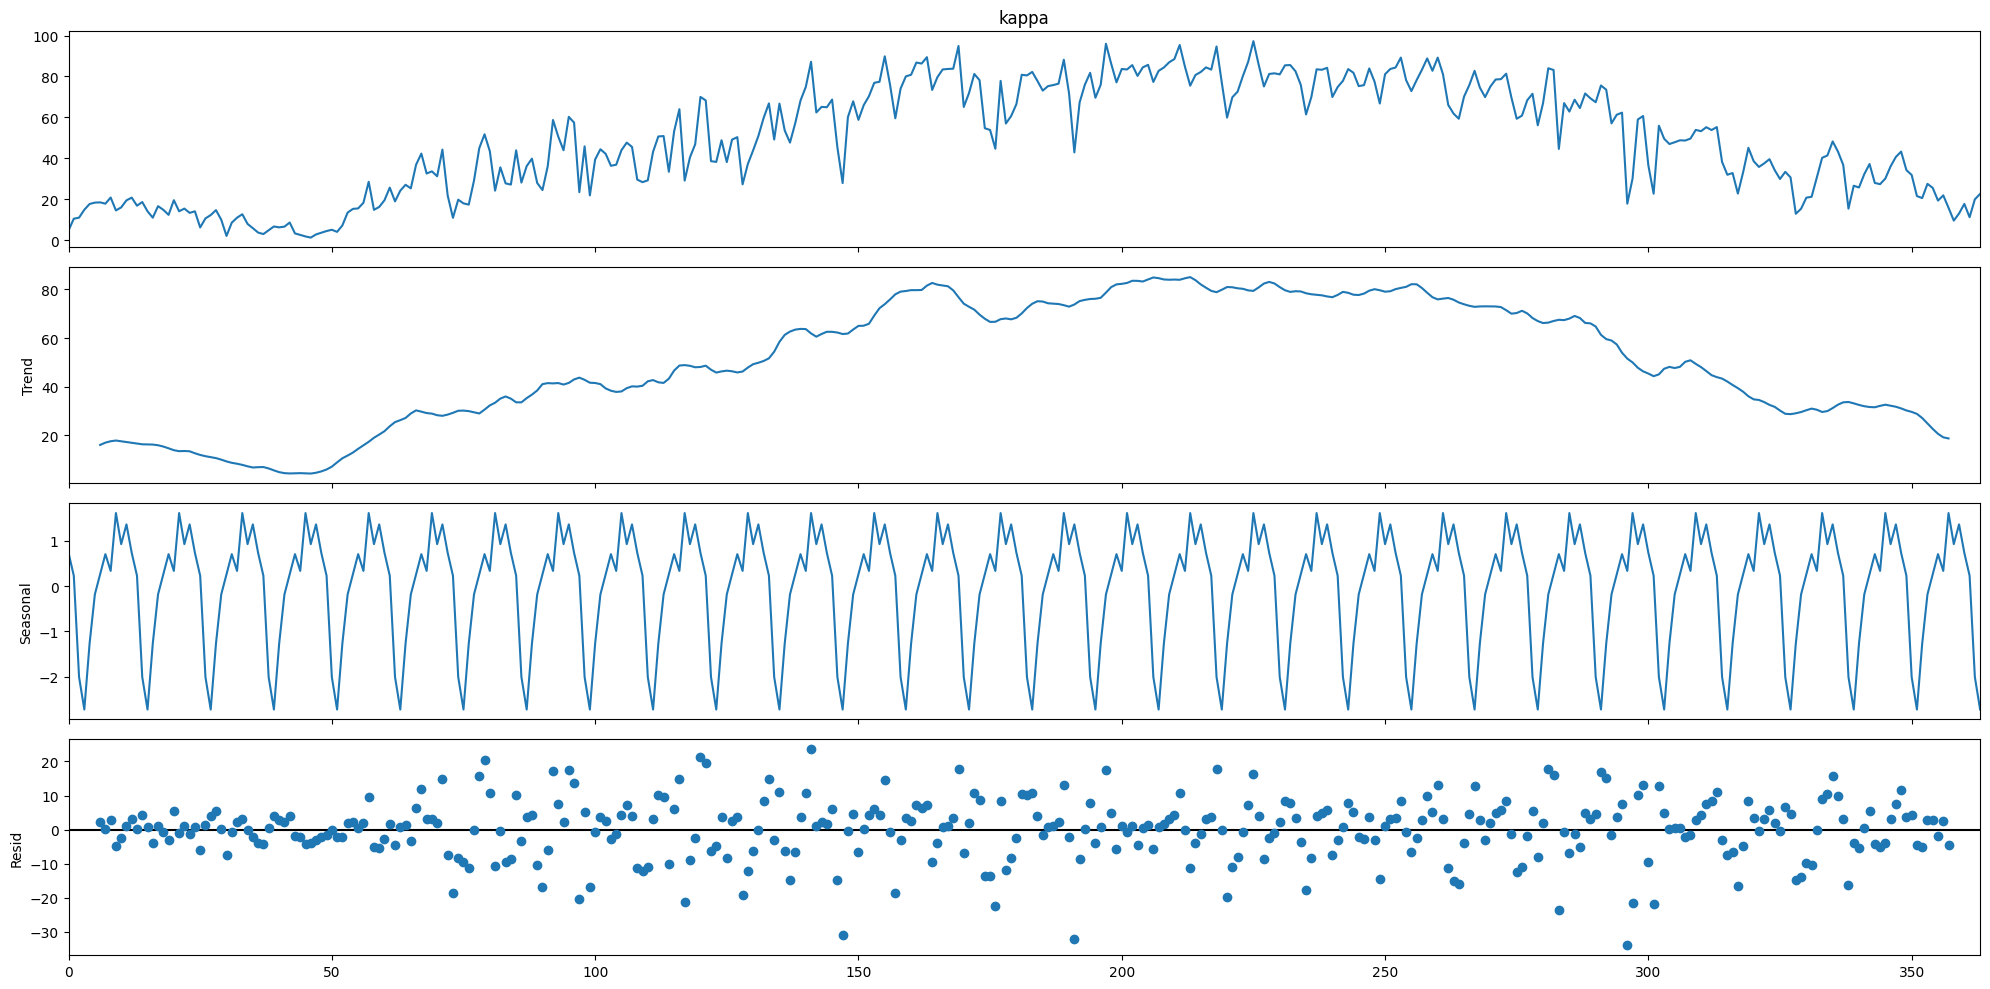

In [6]:
result = sm.tsa.seasonal_decompose(y, model='additive', period=12)
result.plot()

In [9]:
df_month = df.resample('M').mean()
y = df_month['kappa']
train = y[:-12]
test = y[-12:]
sarima_model = sm.tsa.SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'